<a href="https://colab.research.google.com/github/SunainaMandal28/Amazon-/blob/main/day6_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_wine
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn import tree


In [ ]:
#create an instance for load_wine
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
# to make data frame
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[178 rows x 13 columns]

In [ ]:
df['wine_brand']= wine.target
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  wine_brand  
0                            3.92   1065.0           0  
1                            3.40   1050.0           0  
2                            3.17   1185.0           0  
3                            3.45   1480.0           0  
4                            2.93    735.0           0  
..                            ...      ...         ...  
173                          1.74    740.0           2  
174                          1.56    750.0           2  
175                          1.56    835.0           2  
176                          1.62    840.0           2  
177                          1.60    560.0           2  

[178 rows x 14 columns]

In [ ]:
#To know the null value
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
wine_brand                      0
dtype: int64

In [ ]:
#To find duplicate
df.drop_duplicates()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  wine_brand  
0                            3.92   1065.0           0  
1                            3.40   1050.0           0  
2                            3.17   1185.0           0  
3                            3.45   1480.0           0  
4                            2.93    735.0           0  
..                            ...      ...         ...  
173                          1.74    740.0           2  
174                          1.56    750.0           2  
175                          1.56    835.0           2  
176                          1.62    840.0           2  
177                          1.60    560.0           2  

[178 rows x 14 columns]

In [ ]:
df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, color_intensity, hue, od280/od315_of_diluted_wines, proline, wine_brand]
Index: []

In [ ]:
#duplicate dletion
df.drop_duplicates(inplace=True)

In [ ]:
#to check the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  wine_

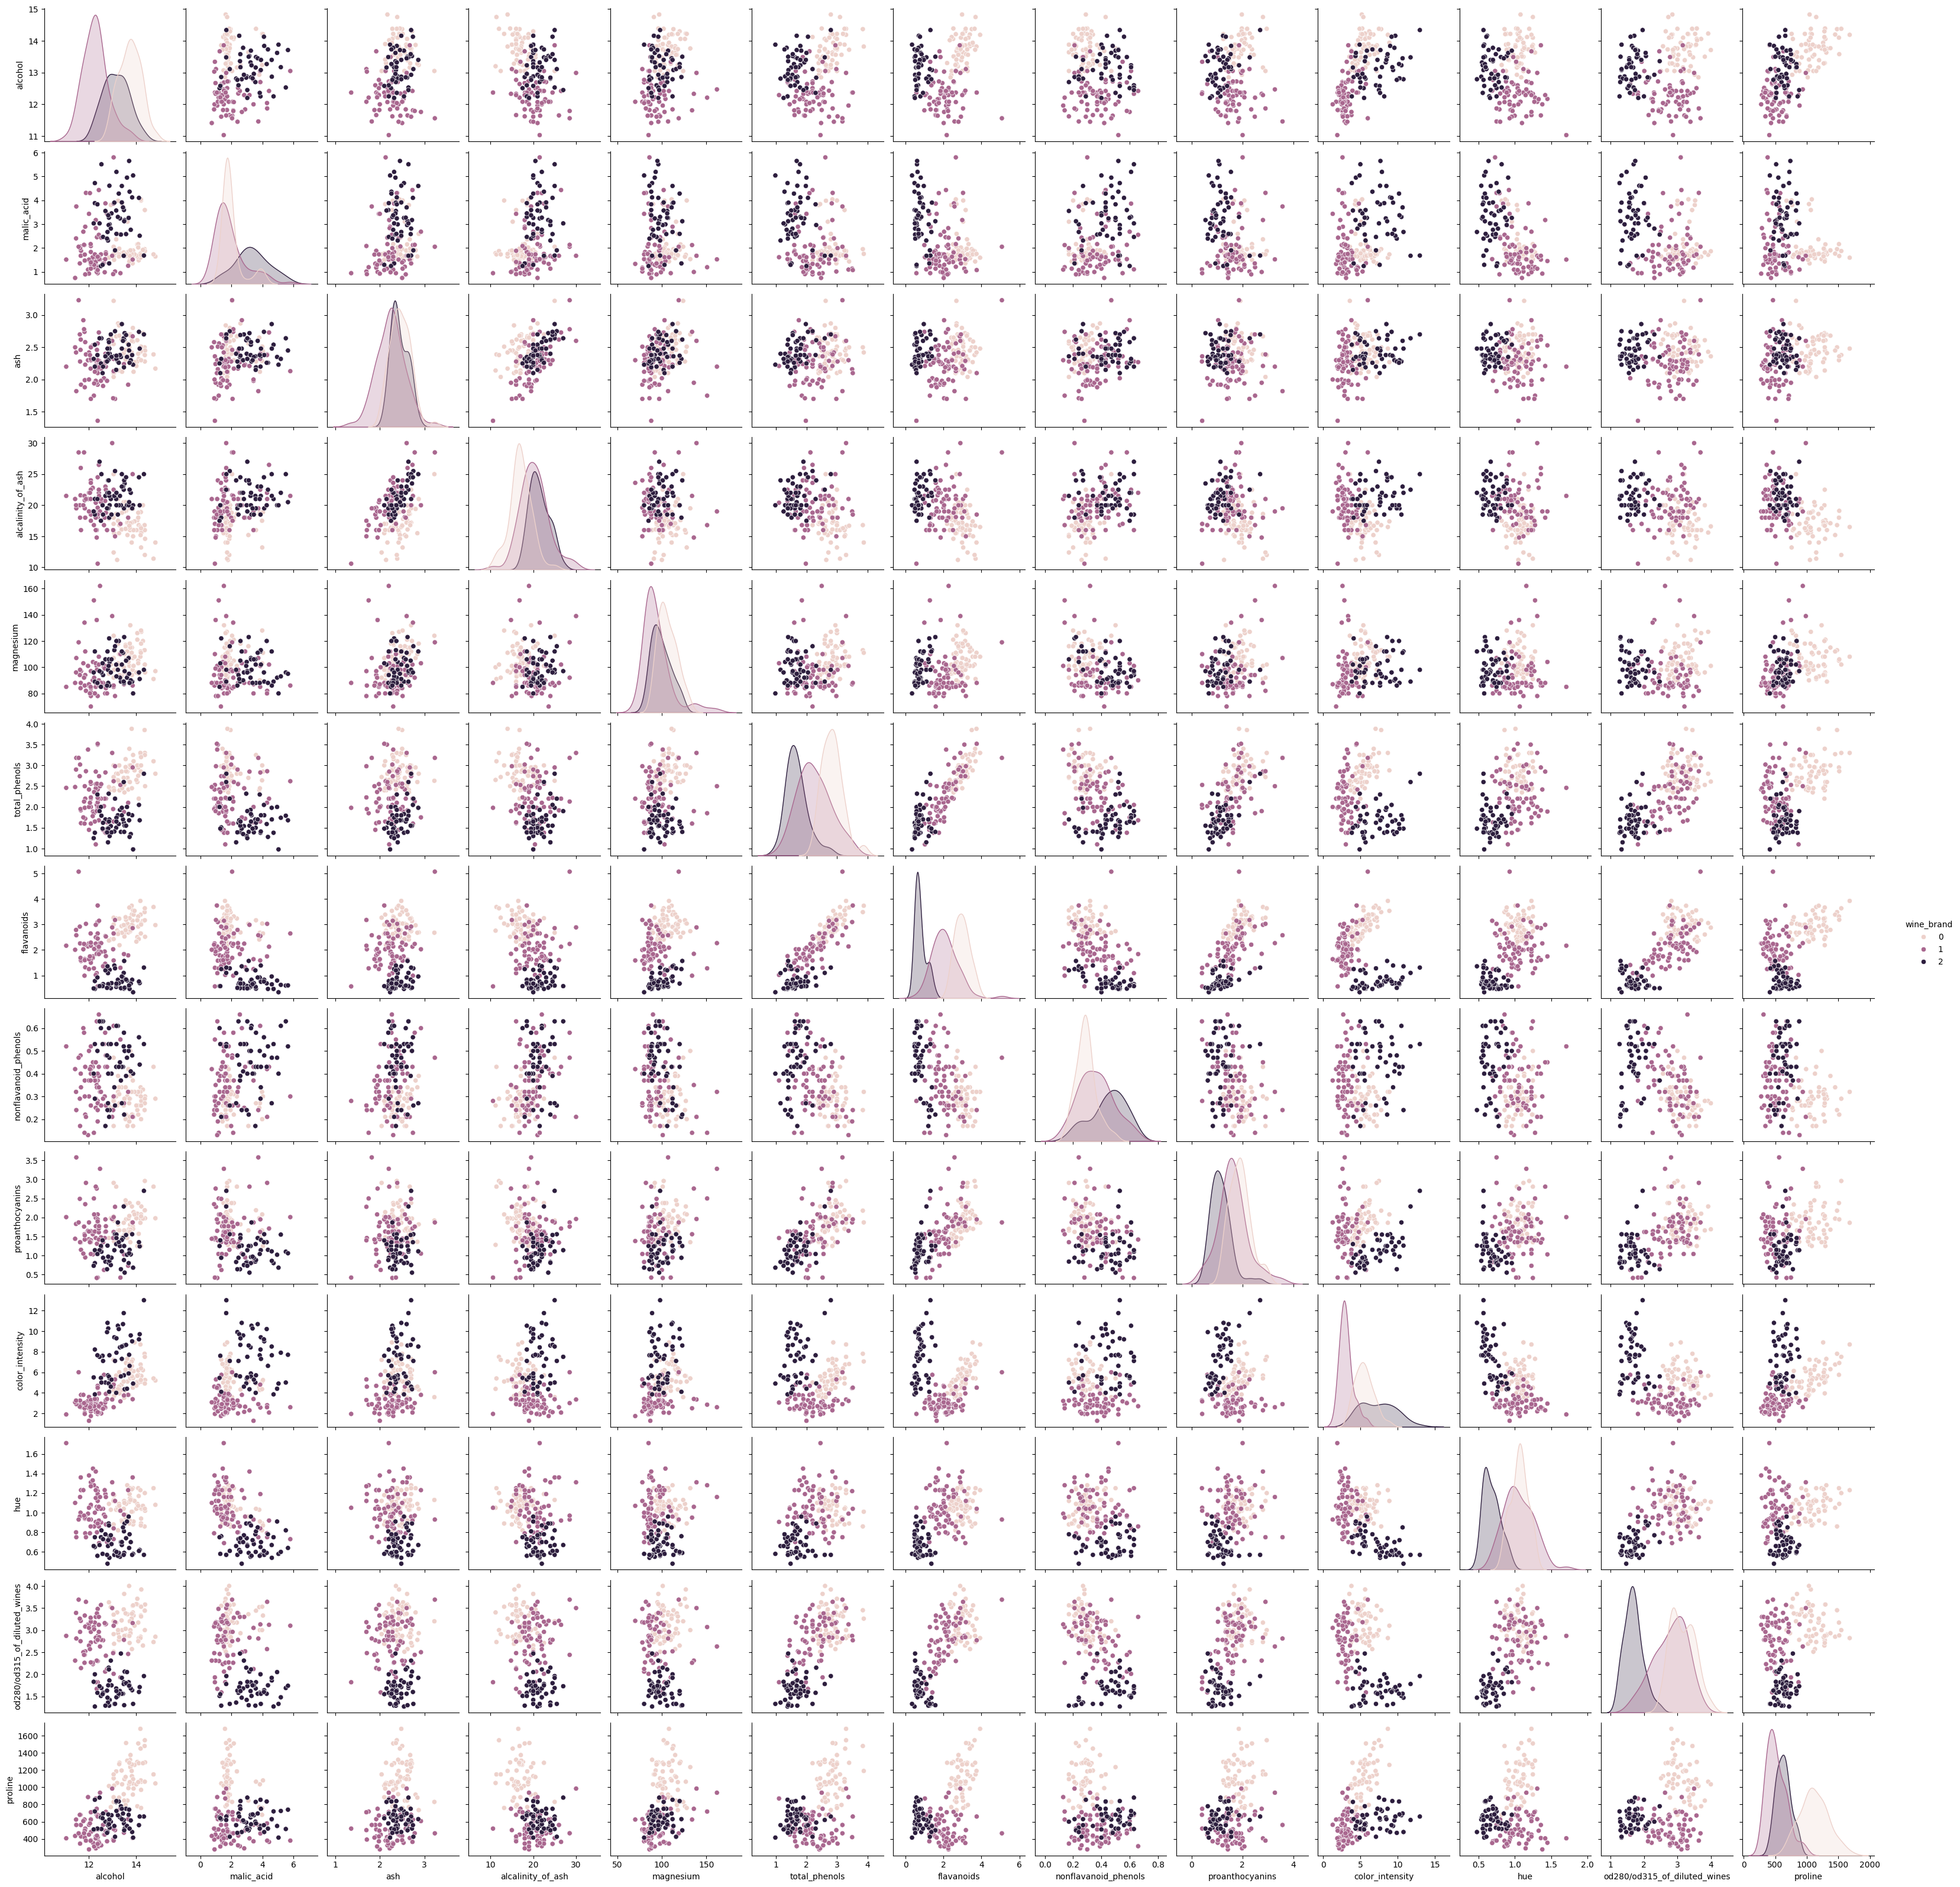

In [ ]:
#pairplot
sns.pairplot(df,hue='wine_brand')
plt.show()

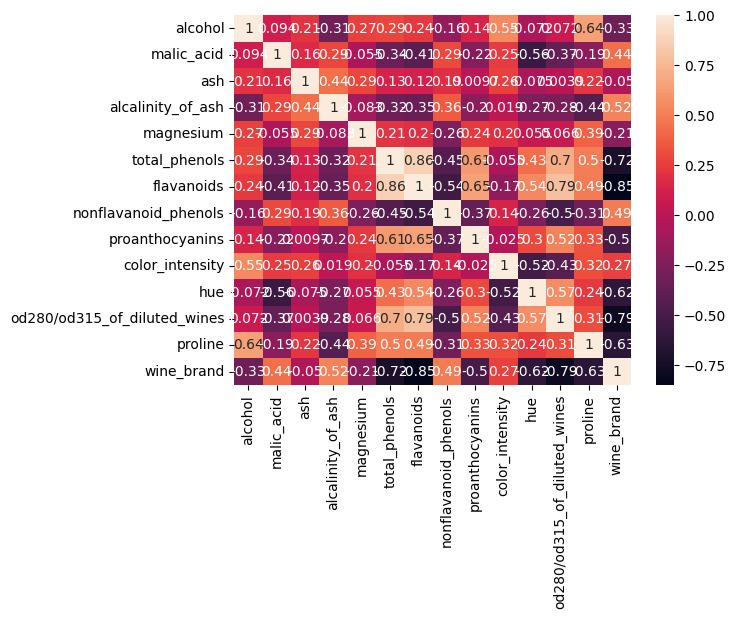

In [ ]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
#preparing data for train-test split
# X= wine.data
# Y=wine.target
# X.shape , Y.shape

In [ ]:
#dataframe use garera
X=df.drop(columns=['wine_brand'],axis=1)
y=df['wine_brand']

In [ ]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40)
X_train.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
85     12.67        0.98  2.24               18.0       99.0           2.20   
65     12.37        1.21  2.56               18.1       98.0           2.42   
59     12.37        0.94  1.36               10.6       88.0           1.98   
130    12.86        1.35  2.32               18.0      122.0           1.51   
151    12.79        2.67  2.48               22.0      112.0           1.48   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
85         1.94                  0.30             1.46             2.62  1.23   
65         2.65                  0.37             2.08             4.60  1.19   
59         0.57                  0.28             0.42             1.95  1.05   
130        1.25                  0.21             0.94             4.10  0.76   
151        1.36                  0.24             1.26            10.80  0.48   

     od280/od315_of_diluted_wines  proline  
85                           3.16    450.0  
65                           2.30    678.0  
59                           1.82    520.0  
130                          1.29    630.0  
151                          1.47    480.0

In [ ]:
X_train.shape

(142, 13)

In [ ]:
y_train.shape

(142,)

In [ ]:
X_test.shape

(36, 13)

In [ ]:
y_test.shape

(36,)

In [ ]:
#models

In [ ]:
#yeta chaii vako classfication algorithm lai store garim dictionary i.e models mah rakhim
models ={
    "LogisticRegression": LogisticRegression(max_iter=200),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "SVC" :SVC(),
}

In [ ]:
#key key chaii name mah nd value chaii model mah rkhim
#CV chaii cross validation le chaii models linxa ani value nikalxa ani score mah rakhxa

results ={}
for name,model in models.items():
  scores = cross_val_score(model,X_train,y_train,cv=5)
  results[name]: np.mean(scores)
  print(f"{name}:Mean CV Accuracy ={np.mean(scores):.3f}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression:Mean CV Accuracy =0.922
DecisionTreeClassifier:Mean CV Accuracy =0.901
RandomForestClassifier:Mean CV Accuracy =0.979
SVC:Mean CV Accuracy =0.683


In [ ]:
cross_val_score(DecisionTreeClassifier(),X_train,y_train,cv=5)

array([0.86206897, 0.89655172, 0.92857143, 0.96428571, 0.78571429])

In [ ]:
#mathi saman garnu parney for model selection for classification and regression

In [ ]:
#Hyper parameter tuning

In [ ]:
#Decision tree bata 2 parameter lim criterion{“gini”, “entropy”, } andmax_depth {1,2,3}

In [ ]:
cross_val_score(DecisionTreeClassifier(criterion='gini', max_depth=1),X_train,y_train,cv=5)

array([0.62068966, 0.65517241, 0.67857143, 0.60714286, 0.64285714])

In [ ]:
cross_val_score(DecisionTreeClassifier(criterion='entropy', max_depth=1),X_train,y_train,cv=5)

array([0.55172414, 0.65517241, 0.57142857, 0.60714286, 0.64285714])

In [ ]:
cross_val_score(DecisionTreeClassifier(criterion='entropy', max_depth=2),X_train,y_train,cv=5)

array([0.89655172, 0.89655172, 0.78571429, 0.85714286, 0.82142857])

In [ ]:
cross_val_score(DecisionTreeClassifier(criterion='gini', max_depth=2),X_train,y_train,cv=5)

array([0.82758621, 0.89655172, 0.92857143, 0.85714286, 0.82142857])

In [ ]:
maxDepth = [1,2,3,4,5]
crit =['gini','entropy']
crossValue = {}
for i in crit:
  for j in maxDepth:
      value = cross_val_score(DecisionTreeClassifier(criterion=i, max_depth=j),X_train, y_train,cv=5)
      crossValue[i+ '_' + str(j)] =np.average(value)
crossValue

{'gini_1': np.float64(0.6408866995073892),
 'gini_2': np.float64(0.8662561576354679),
 'gini_3': np.float64(0.9086206896551724),
 'gini_4': np.float64(0.8945812807881774),
 'gini_5': np.float64(0.9224137931034482),
 'entropy_1': np.float64(0.6056650246305418),
 'entropy_2': np.float64(0.8514778325123153),
 'entropy_3': np.float64(0.9081280788177339),
 'entropy_4': np.float64(0.9081280788177339),
 'entropy_5': np.float64(0.9007389162561577)}

In [ ]:
#Grid search (Model selection ko algorithm)

In [ ]:
gs =GridSearchCV(DecisionTreeClassifier(),{
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5]
    },cv=5,return_train_score=False)
gs.fit(X_train,y_train)
gs.cv_results_

{'mean_fit_time': array([0.00422597, 0.00424986, 0.00387497, 0.00389781, 0.00408311,
        0.00365033, 0.00403357, 0.00411692, 0.00429955, 0.00450969]),
 'std_fit_time': array([7.69826663e-04, 4.36066692e-04, 9.22530677e-05, 1.02307365e-04,
        3.09781120e-04, 2.42319786e-04, 4.54950205e-04, 1.88118792e-04,
        2.09290972e-04, 4.24842026e-04]),
 'mean_score_time': array([0.00299206, 0.00280056, 0.00263438, 0.00262313, 0.00256624,
        0.00248752, 0.00256677, 0.00265479, 0.00282044, 0.00297503]),
 'std_score_time': array([6.21869472e-04, 1.68921850e-04, 1.53426503e-04, 9.24000916e-05,
        3.06875739e-05, 6.36354507e-05, 1.66872119e-04, 2.65420044e-04,
        3.67148740e-04, 3.90630471e-04]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'gini', 'entropy',
                    'entropy', 'entropy', 'entropy', 'entropy'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_val

In [ ]:
#create a data frame to make the output clean
df = pd.DataFrame(gs.cv_results_)
df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.004226      0.000770         0.002992        0.000622   
1       0.004250      0.000436         0.002801        0.000169   
2       0.003875      0.000092         0.002634        0.000153   
3       0.003898      0.000102         0.002623        0.000092   
4       0.004083      0.000310         0.002566        0.000031   
5       0.003650      0.000242         0.002488        0.000064   
6       0.004034      0.000455         0.002567        0.000167   
7       0.004117      0.000188         0.002655        0.000265   
8       0.004300      0.000209         0.002820        0.000367   
9       0.004510      0.000425         0.002975        0.000391   

  param_criterion  param_max_depth                                    params  \
0            gini                1     {'criterion': 'gini', 'max_depth': 1}   
1            gini                2     {'criterion': 'gini', 'max_depth': 2}   
2            gini                3     {'criterion': 'gini', 'max_depth': 3}   
3            gini                4     {'criterion': 'gini', 'max_depth': 4}   
4            gini                5     {'criterion': 'gini', 'max_depth': 5}   
5         entropy                1  {'criterion': 'entropy', 'max_depth': 1}   
6         entropy                2  {'criterion': 'entropy', 'max_depth': 2}   
7         entropy                3  {'criterion': 'entropy', 'max_depth': 3}   
8         entropy                4  {'criterion': 'entropy', 'max_depth': 4}   
9         entropy                5  {'criterion': 'entropy', 'max_depth': 5}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.620690           0.655172           0.678571           0.607143   
1           0.827586           0.896552           0.928571           0.857143   
2           0.862069           0.896552           0.964286           0.964286   
3           0.862069           1.000000           0.964286           0.964286   
4           0.862069           0.965517           0.928571           0.964286   
5           0.551724           0.655172           0.571429           0.607143   
6           0.896552           0.896552           0.785714           0.857143   
7           0.931034           0.896552           0.821429           0.964286   
8           0.931034           0.965517           0.821429           0.964286   
9           0.931034           0.896552           0.821429           0.964286   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.642857         0.640887        0.025198                9  
1           0.785714         0.859113        0.050222                7  
2           0.857143         0.908867        0.047243                4  
3           0.857143         0.929557        0.058605                1  
4           0.857143         0.915517        0.047567                2  
5           0.642857         0.605665        0.039795               10  
6           0.785714         0.844335        0.049980                8  
7           0.857143         0.894089        0.050879                5  
8           0.892857         0.915025        0.053822                3  
9           0.857143         0.894089        0.050879                5

In [ ]:
#to list out 3 column
df[['param_criterion','param_max_depth'	, 'mean_test_score']]

param_criterion  param_max_depth  mean_test_score
0            gini                1         0.640887
1            gini                2         0.859113
2            gini                3         0.908867
3            gini                4         0.929557
4            gini                5         0.915517
5         entropy                1         0.605665
6         entropy                2         0.844335
7         entropy                3         0.894089
8         entropy                4         0.915025
9         entropy                5         0.894089

In [ ]:
dir(gs)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_format_results',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_routed_params_for_fit',
 '_get_scorers',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_run_sea

In [ ]:
#hmile best_parameter k ho tyo vanxa
gs.best_params_


{'criterion': 'gini', 'max_depth': 4}

In [ ]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=4)

In [ ]:
#classification
clf=DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9166666666666666

In [ ]:
accuracy_score=(y_test, predict)